In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import seaborn as sns

from pylab import rcParams
rcParams['figure.figsize'] = (10, 7)

import pandas as pd
pd.set_option('max_columns', 40)
pd.set_option('max_rows', 20)
pd.set_option('precision', 3)

In [2]:
housing = pd.read_csv('housing_train_set.csv')

housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.704,286600.0,<1H OCEAN
1,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.421,340600.0,<1H OCEAN
2,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.862,196900.0,NEAR OCEAN
3,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.884,46300.0,INLAND
4,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.035,254500.0,<1H OCEAN


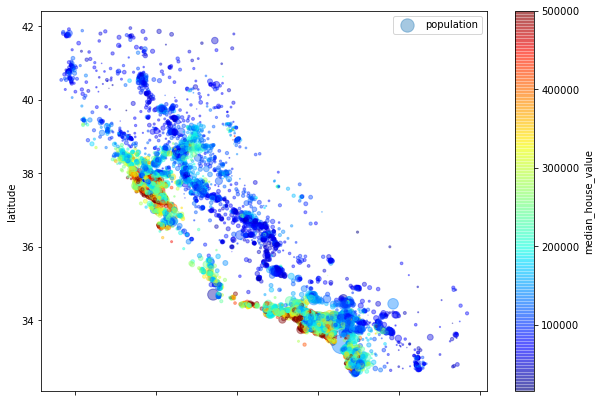

In [3]:
housing.plot(x='longitude',
             y='latitude',
             kind='scatter',
             alpha=0.4,
             s=housing.population / 100,
             label='population',
             c='median_house_value',
             cmap=plt.get_cmap('jet'),
             colorbar=True)

In [4]:
corr_matrix = housing.corr()

corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000,-0.924,-0.106,0.049,0.077,0.108,0.063,-0.020,-0.047
latitude,-0.924,1.000,0.006,-0.039,-0.072,-0.115,-0.078,-0.075,-0.143
housing_median_age,-0.106,0.006,1.000,-0.365,-0.325,-0.299,-0.306,-0.111,0.114
total_rooms,0.049,-0.039,-0.365,1.000,0.929,0.855,0.918,0.200,0.135
total_bedrooms,0.077,-0.072,-0.325,0.929,1.000,0.876,0.980,-0.010,0.048
population,0.108,-0.115,-0.299,0.855,0.876,1.000,0.905,0.002,-0.027
households,0.063,-0.078,-0.306,0.918,0.980,0.905,1.000,0.011,0.065
median_income,-0.020,-0.075,-0.111,0.200,-0.010,0.002,0.011,1.000,0.687
median_house_value,-0.047,-0.143,0.114,0.135,0.048,-0.027,0.065,0.687,1.000


In [5]:
corr_matrix.median_house_value.sort_values(ascending=False)

median_house_value    1.000
median_income         0.687
total_rooms           0.135
housing_median_age    0.114
households            0.065
total_bedrooms        0.048
population           -0.027
longitude            -0.047
latitude             -0.143
Name: median_house_value, dtype: float64

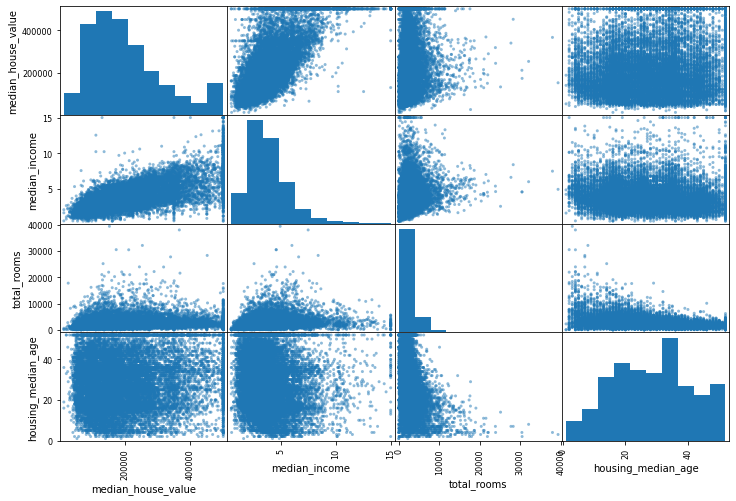

In [6]:
from pandas.plotting import scatter_matrix

attibutes = [
    'median_house_value', 'median_income', 'total_rooms', 'housing_median_age'
]

scatter_matrix(housing[attibutes], figsize=(12, 8));

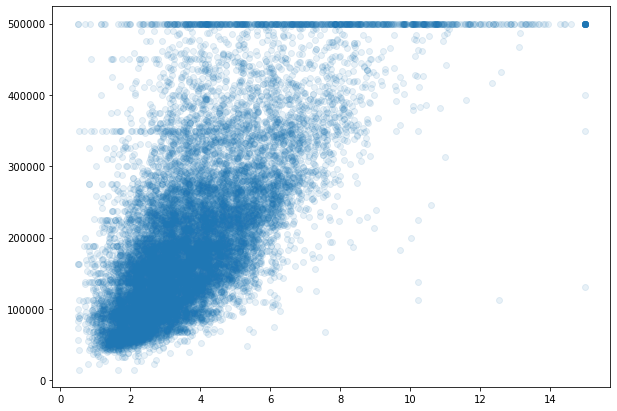

In [7]:
plt.scatter(housing.median_income, housing.median_house_value, alpha=0.1)

In [8]:
housing['rooms_per_household'] = housing.total_rooms / housing.households
housing['bedrooms_per_room'] = housing.total_bedrooms / housing.total_rooms
housing['population_per_household'] = housing.population / housing.households

In [9]:
corr_matrix = housing.corr()

corr_matrix.median_house_value.sort_values(ascending=False)

median_house_value          1.000
median_income               0.687
rooms_per_household         0.146
total_rooms                 0.135
housing_median_age          0.114
households                  0.065
total_bedrooms              0.048
population_per_household   -0.022
population                 -0.027
longitude                  -0.047
latitude                   -0.143
bedrooms_per_room          -0.260
Name: median_house_value, dtype: float64